**[CÓDIGO 1]**

In [1]:
# Esta celda solo haría falta ejecutarla la primera vz que se ejecuta el notebook
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[CÓDIGO 2]


In [ ]:
# Importamos la librería
import openpyxl

**[CÓDIGO 3]**


In [ ]:
# Cargamos los datos
excel_file = openpyxl.load_workbook('sample_data/sample_data.xlsx')
excel_file

**[CÓDIGO 4]**

In [ ]:
# Mostramos el tipo de datos
print(type(excel_file))

<class 'openpyxl.workbook.workbook.Workbook'>


**[CÓDIGO 5]**

In [ ]:
# Obtenemos el nombre de las hojas
excel_file.get_sheet_names()

<ipython-input-8-ccaa4884b0f7>:2: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  excel_file.get_sheet_names()


['curso_2122', 'curso_2021']

**[CÓDIGO 6]**

In [ ]:
# Obtenemos la hoja activa
active_sheet = excel_file.active

**[CÓDIGO 7]**

In [ ]:
# Nombre de la hoja activa
active_sheet.title

'curso_2021'

**[CÓDIGO 8]**

In [ ]:
# Cargamos los datos de una hoja
sheet = excel_file.get_sheet_by_name('curso_2021')

<ipython-input-13-3cfdf560a447>:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = excel_file.get_sheet_by_name('curso_2021')


**[CÓDIGO 9]**

In [ ]:
# Accediendo al contenido de una celda concreta
sheet['A1'].value

'nombre_escuela'

**[CÓDIGO 10]**

In [ ]:
# Accediendo al contenido de una celda concreta
sheet.cell(row=1, column=1).value

'nombre_escuela'

**[CÓDIGO 11]**

In [ ]:
# Objeto celda
sheet['A1']

<Cell 'curso_2021'.A1>

**[CÓDIGO 12]**

In [ ]:
# Contenido de la fila 2
sheet[2]
# Contenido de la columna A
sheet['A']

(<Cell 'curso_2021'.A1>, <Cell 'curso_2021'.A2>)

In [ ]:
# Contenido de la columna A
sheet['A']

**[CÓDIGO 13]**

In [ ]:
# Accediendo a un rango de celdas
multiple_cells = sheet['A1':'C2']
for row in multiple_cells:
    for cell in row:
        print(cell.value)

nombre_escuela
nombre_alumno
fecha_matrícula
escuela_1
alumno_1
fecha_1


**[CÓDIGO 14]**

In [ ]:
# Accediendo a todas las filas y columnas. Forma 1
values = []
rows = sheet.rows
for row in rows:
    for cell in row:
        values.append(cell.value)
values

['nombre_escuela',
 'nombre_alumno',
 'fecha_matrícula',
 'escuela_1',
 'alumno_1',
 'fecha_1']

**[CÓDIGO 15]**

In [ ]:
# Accediendo a todas las filas y columnas. Forma 2
for value in sheet.iter_rows(min_row=1, max_row=2,
                             min_col=1, max_col=3,
                             values_only=True):
     print(value)

('nombre_escuela', 'nombre_alumno', 'fecha_matrícula')
('escuela_1', 'alumno_1', 'fecha_1')


**[CÓDIGO 16]**

In [ ]:
# Almacenando la información en un diccionario
alumnos = {}
cont = 0
for row in sheet.iter_rows(min_row=2,
                           min_col=1,
                           max_col=3,
                           values_only=True):
    alumno_id = cont
    alumno = {
        "nombre_escuela": row[0],
        "nombre_alumno": row[1],
        "fecha_matrícula": row[2]
    }
    alumnos[alumno_id] = alumno
    cont += 1

In [ ]:
alumnos

{0: {'fecha_matrícula': 'fecha_1',
  'nombre_alumno': 'alumno_1',
  'nombre_escuela': 'escuela_1'}}

**[CÓDIGO 17]**

In [ ]:
import pandas as pd

df = pd.read_csv("sample_data/usuarios_lenguajes.csv") 
print(df)

  lenguaje  usuarios  hombres  mujeres
0   python        56       30       26
1     java        21        8       13
2    scala        32       15       17
3        r        12        9        3
4      c++        23       13       10


**[CÓDIGO 18]**

In [ ]:
df2 = pd.read_csv("usuarios_lenguajes2.csv", header=None)
print(df2)

        0   1   2   3
0  python  56  30  26
1    java  21   8  13
2   scala  32  15  17
3       r  12   9   3
4     c++  23  13  10


**[CÓDIGO 19]**

In [ ]:
df2 = pd.read_csv("sample_data/usuarios_lenguajes2.csv", header=None, 
                  names=["lenguaje", "usuarios","hombres","mujeres"]) 
print(df2)

  lenguaje  usuarios  hombres  mujeres
0   python        56       30       26
1     java        21        8       13
2    scala        32       15       17
3        r        12        9        3
4      c++        23       13       10


**[CÓDIGO 20]**

In [ ]:
df3 = pd.read_csv("sample_data/usuarios_lenguajes3.csv", index_col=0) 
print(df3)

  lenguaje  usuarios  hombres  mujeres
0   python        56       30       26
1     java        21        8       13
2    scala        32       15       17
3        r        12        9        3
4      c++        23       13       10


**[CÓDIGO 21]**

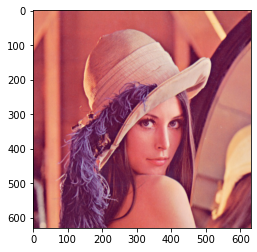

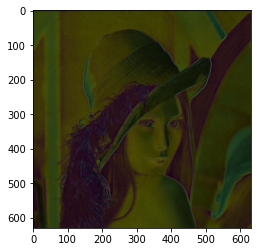

ValueError: ignored

In [ ]:
# Librerias necesarias
from skimage import io
from skimage import filters
import matplotlib.pyplot as plt

# Abrimos la imagen
imagen = io.imread('sample_data/leena.png')
plt.imshow(imagen, cmap='gray')
plt.show()

# Filtros: sobel, roberts, prewitt
filtros = [filters.sobel, filters.roberts, filters.prewitt]

for filtro in filtros:
    # Aplicamos cada uno de los filtros
    img_fil = filtro(imagen)
    
    # Mostramos los resultados 
    plt.imshow(img_fil, cmap='gray')
    plt.show()



**[CÓDIGO 22]**

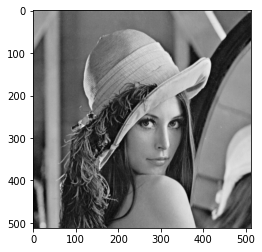

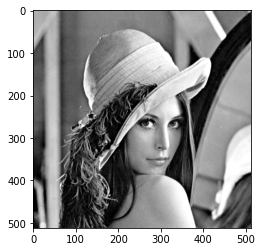

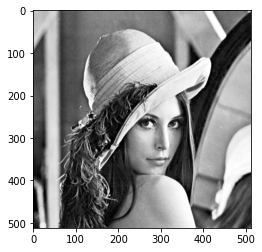

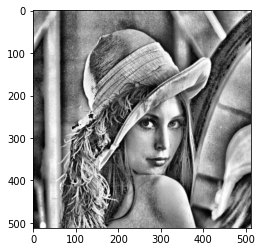

In [ ]:
from skimage import exposure
from skimage import io
import numpy as np

# Estiramiento de contraste
p2, p98 = np.percentile(imagen, (2,98))
img_rescale = exposure.rescale_intensity(imagen, in_range=(p2,p98))

# Ecualización
img_eq = exposure.equalize_hist(imagen)

# Ecualización adaptiva
img_adapteq = exposure.equalize_adapthist(imagen, clip_limit=0.03)

for eq in (imagen, img_rescale, img_eq, img_adapteq):
    plt.imshow(eq, cmap='gray')
    plt.show()

**[CÓDIGO 23]**

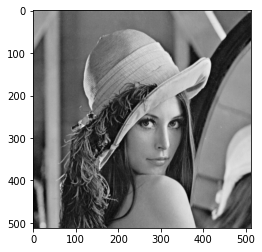

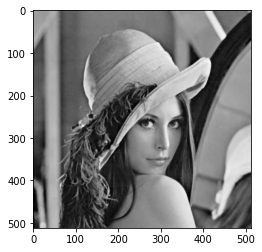

In [ ]:
from skimage.filters.rank import median

med = median(imagen)

plt.imshow(imagen, cmap='gray')
plt.show()
plt.imshow(med, cmap='gray')
plt.show()

[CÓDIGO 24]

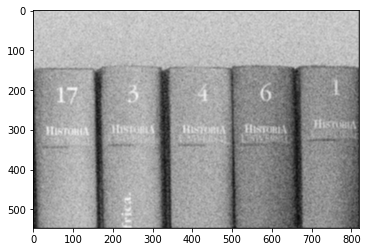

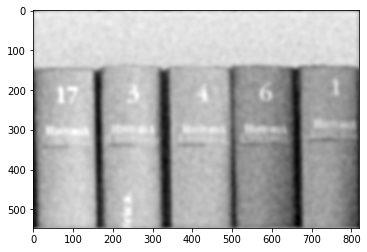

In [ ]:
import numpy as np

from scipy.signal import convolve2d
from skimage import io
from skimage import restoration
from skimage.color import rgb2gray

imagen = io.imread('sample_data/foto_ruido.png')  # cargamos la imagen original
imagen_gray = rgb2gray(imagen)        # la pasamos a escala de grises

psf = np.ones((5,5)) / 25
img = convolve2d(imagen_gray, psf, 'same')          # distorsionamos la imagen
deconvolved_img = restoration.wiener(img, psf, 100) #restauramos

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(deconvolved_img, cmap='gray')
plt.show()

**[CÓDIGO 25]**

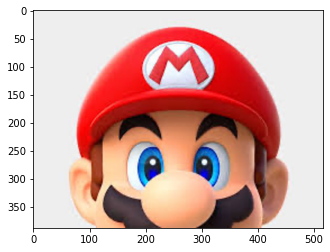

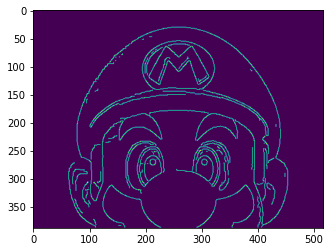

In [ ]:
from skimage import io
from skimage import feature
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

imagen = io.imread("mario.jpg")
img = rgb2gray(imagen)
edge = feature.canny(img)
plt.imshow(imagen)
plt.show()
plt.imshow(edge)
plt.show()

**[CÓDIGO 26]**

In [ ]:
import cv2

captura = cv2.VideoCapture(0)

while captura.isOpened():
   ret, imagen = captura.read()
   if ret:
       cv2.imshow('video', imagen)
       if cv2.waitKey(1) & 0xFF == ord('s'):
           break
   else:
       break

captura.release()
cv2.destroyAllWindows()

**[CÓDIGO 27]**

In [ ]:
import cv2

captura = cv2.VideoCapture(0)
salida = cv2.VideoWriter('videoSalida.avi', cv2.VideoWriter_fourcc(*'XVID'),
                         20.0, (640, 480))

while captura.isOpened():
    ret, imagen = captura.read()
    if ret:
        cv2.imshow('video', imagen)
        salida.write(imagen)
        if cv2.waitKey(1) & 0xFF == ord('s'):
            break
    else:
        break
        
captura.release()
salida.release()
cv2.destroyAllWindows()

**[CÓDIGO 28]**

In [ ]:
import cv2

captura = cv2.VideoCapture('videoSalida.avi')

while captura.isOpened():
   ret, imagen = captura.read()
   if ret:
       cv2.imshow('video', imagen)
       if cv2.waitKey(30) == ord('s'):
           break
   else:
       break
      
captura.release()
cv2.destroyAllWindows()

**[CÓDIGO 29]**

In [ ]:
conda install -c anaconda beautifulsoup4
conda install -c anaconda requests
conda install -c conda-forge wordcloud


**[CÓDIGO 30]**

In [ ]:
import requests
from os import path
from pathlib import PurePath

paths = []

with open('urls.txt', 'r') as fh:
   urls = fh.readlines()

urls = [url.strip() for url in urls]

for url in urls:
   file_name = PurePath(url).name
   file_path = path.join('.', file_name)
   text = ''

   try:
       response = requests.get(url)
       if response.ok:
           text = response.text
   except requests.exceptions.ConnectionError as exc:
       print(exc)

   with open(file_path, 'w') as fh:
       fh.write(text)

   paths.append(file_path)

   print('Written to ', file_path)

**[CÓDIGO 31]**

In [ ]:
​​import requests
import sys
 
from bs4 import BeautifulSoup
from os import path
from pathlib import PurePath
 
def download_urls(urls, dir):
   paths = []
 
   for url in urls:
       file_name = PurePath(url).name
       file_path = path.join(dir, file_name)
       text = ''
 
       try:
           response = requests.get(url)
           if response.ok:
               text = response.text
           else:
               print('Mala respuesta para', url, response.status_code)
       except requests.exceptions.ConnectionError as exc:
           print(exc)
 
       with open(file_path, 'w') as fh:
           fh.write(text)
 
       paths.append(file_path)
 
   return paths
 
 
def parse_html(path):
   with open(path, 'r') as fh:
       content = fh.read()
 
   return BeautifulSoup(content, 'html.parser')
 
 
def download(urls):
   return download_urls(urls, '.')
 
 
def extract(path):
   return parse_html(path)
 
 
def transform(soup):
   container = soup.find(id='container')
   if container is not None:
       return container.get_text()
 
 
def load(key, value):
   d = {}
   d[key] = value
   return d
 
 
def run_single(path):
   soup = extract(path)
   content = transform(soup)
   unserialised = load(path, content.strip() if content is not None else '')
   return unserialised
 
 
def run_everything():
   l = []
 
   with open('urls.txt', 'r') as fh:
       urls = fh.readlines()
   urls = [url.strip() for url in urls]
 
   paths = download(urls)
   for path in paths:
       print('Written to', path)
       l.append(run_single(path))
 
   print(l)
 
 
if __name__ == "__main__":
   args = sys.argv
 
   if len(args) is 1:
       run_everything()
   else:
       if args[1] == 'download':
           download([args[2]])
           print('Done')
       if args[1] == 'parse':
           path = args[2]
           result = run_single(path)
           print(result)

**[CÓDIGO 32]**

In [ ]:
import requests
import sys

from bs4 import BeautifulSoup
from os import path
from pathlib import Path, PurePath
from wordcloud import WordCloud

STOPWORDS_ADDENDUM = [
   'Das',
   'Der',
   'Die',
   'Diese',
   'Eine',
   'In',
   'InhaltsverzeichnisGrundgesetz',
   'im',
   'Jede',
   'Jeder',
   'Kein',
   'Sie',
   'Soweit',
   'Über'
]
STOPWORDS_FILE_PATH = 'stopwords.txt'
STOPWORDS_URL = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-de/master/stopwords-de.txt'


def download_urls(urls, dir):
   paths = []

   for url in urls:
       file_name = PurePath(url).name
       file_path = path.join(dir, file_name)
       text = ''

       try:
           response = requests.get(url)
           if response.ok:
               text = response.text
           else:
               print('Mala respuesta para', url, response.status_code)
       except requests.exceptions.ConnectionError as exc:
           print(exc)

       with open(file_path, 'w') as fh:
           fh.write(text)

       paths.append(file_path)

   return paths


def parse_html(path):
   with open(path, 'r') as fh:
       content = fh.read()

   return BeautifulSoup(content, 'html.parser')


def download_stopwords():
   stopwords = ''

   try:
       response = requests.get(STOPWORDS_URL)
       if response.ok:
           stopwords = response.text
       else:
           print('Mala respuesta para', url, response.status_code)
   except requests.exceptions.ConnectionError as exc:
       print(exc)

   with open(STOPWORDS_FILE_PATH, 'w') as fh:
       fh.write(stopwords)

   return stopwords


def download(urls):
   return download_urls(urls, '.')


def extract(path):
   return parse_html(path)


def transform(soup):
   container = soup.find(id='container')
   if container is not None:
       return container.get_text()


def load(filename, text):
   if Path(STOPWORDS_FILE_PATH).exists():
       with open(STOPWORDS_FILE_PATH, 'r') as fh:
           stopwords = fh.readlines()
   else:
       stopwords = download_stopwords()

   # Tira de espacios en blanco alrededor
   stopwords = [stopword.strip() for stopword in stopwords]
   # Extienda las stopwords con las propias, que se determinaron después de     la primera ejecución stopwords = stopwords + STOPWORDS_ADDENDUM

   try:
       cloud = WordCloud(stopwords=stopwords).generate(text)
       cloud.to_file(filename.replace('.html', '.png'))
   except ValueError:
       print('No se pudo generar la nube de palabras para', key)


def run_single(path):
   soup = extract(path)
   content = transform(soup)
   load(path, content.strip() if content is not None else '')


def run_everything():
   with open('urls.txt', 'r') as fh:
       urls = fh.readlines()
   urls = [url.strip() for url in urls]

   paths = download(urls)
   for path in paths:
       print('Written to', path)
       run_single(path)
   print('Done')


if __name__ == "__main__":
   args = sys.argv

   if len(args) is 1:
       run_everything()
   else:
       if args[1] == 'download':
           download([args[2]])
           print('Done')
       if args[1] == 'parse':
           path = args[2]
           run_single(path)
           print('Done')